In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.activations import linear, relu, sigmoid # type: ignore

In [3]:
data = pd.read_excel("simulated_data1.xlsx")
data.shape

(1000, 301)

In [4]:
X = data.iloc[:, :300]
y = data.iloc[:, 300]
print(X.shape)
print(y.shape)

(1000, 300)
(1000,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(700, 300) (300, 300)
(700,) (300,)


In [46]:
tf.random.set_seed(1)
model = Sequential(
    [
        tf.keras.layers.InputLayer((300,)),
        tf.keras.layers.Dense(40, activation="relu", name="L1"),
        tf.keras.layers.Dense(25, activation="relu", name="L2"),
        tf.keras.layers.Dense(15, activation="relu", name="L3"),
        tf.keras.layers.Dense(1, activation="linear", name="L4")
    ]
)
model.compile(optimizer='adam', loss='mse') 

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 40)                12040     
                                                                 
 L2 (Dense)                  (None, 25)                1025      
                                                                 
 L3 (Dense)                  (None, 15)                390       
                                                                 
 L4 (Dense)                  (None, 1)                 16        
                                                                 
Total params: 13471 (52.62 KB)
Trainable params: 13471 (52.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
22/22 [==============================] - 1s 3ms/step - loss: 3417.8853
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 8.6008
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 2.9873
Epoch 4/50
22/22 [==============================] - 0s 2ms/step - loss: 1.3155
Epoch 5/50
22/22 [==============================] - 0s 3ms/step - loss: 0.8607
Epoch 6/50
22/22 [==============================] - 0s 2ms/step - loss: 0.7766
Epoch 7/50
22/22 [==============================] - 0s 2ms/step - loss: 0.7370
Epoch 8/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4975
Epoch 9/50
22/22 [==============================] - 0s 3ms/step - loss: 1.0174
Epoch 10/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4814
Epoch 11/50
22/22 [==============================] - 0s 2ms/step - loss: 0.0954
Epoch 12/50
22/22 [==============================] - 0s 3ms/step - loss: 0.0821
Epoch 13/50
22/22 [===========================

In [49]:
yhat = model.predict(X_train)
pd.DataFrame({"yhat": yhat[:, 0], 'y': y_train})

22/22 [==============================] - 0s 2ms/step


,yhat,y
105,-0.567481,-0.569472
68,-0.297046,-0.300194
479,-0.991102,-0.991262
399,1.074916,1.079546
434,0.480527,0.479785
...,...,...
835,-0.206587,-0.210131
192,1.077789,1.082407
629,1.432151,1.439324
559,0.294727,0.291984


In [50]:
rmse = root_mean_squared_error(y_train, yhat)
rmse

0.047168482513943844

In [51]:
yhat_test = model.predict(X_test)
pd.DataFrame({"yhat": yhat_test[:, 0], 'y': y_test})

10/10 [==============================] - 0s 4ms/step


,yhat,y
993,1.679412,1.688386
859,0.924583,0.928131
298,1.670638,1.679519
553,-0.829916,-0.830762
672,0.313543,0.311011
...,...,...
167,0.582595,0.582970
998,-0.626783,-0.628522
984,0.592200,0.592680
491,0.762386,0.764696


In [52]:
rmse = root_mean_squared_error(y_test, yhat_test)
rmse

0.06464054098935867

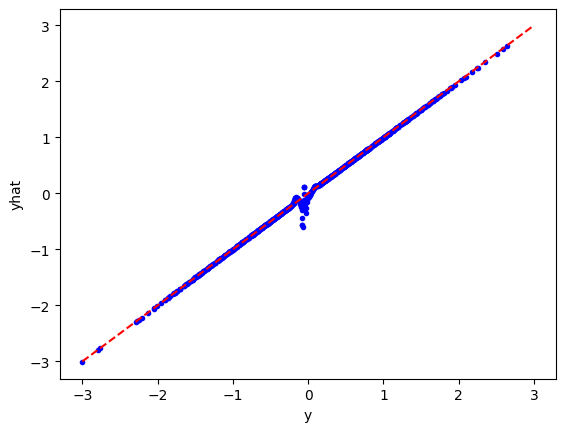

In [53]:
plt.plot(y_train, yhat, '.b')
plt.plot(np.arange(-3, 3, 0.01), np.arange(-3, 3, 0.01), '--r')
plt.xlabel("y")
plt.ylabel("yhat")
plt.show()

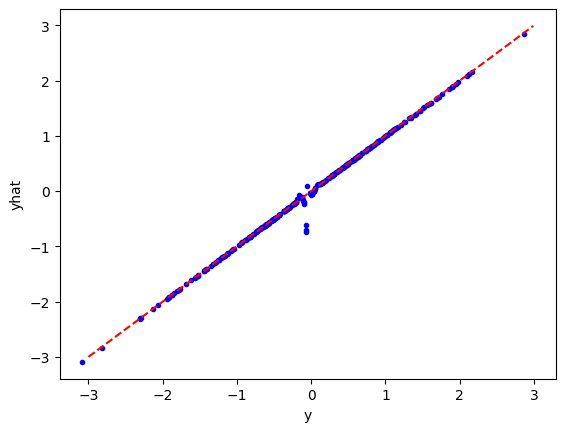

In [54]:
plt.plot(y_test, yhat_test, '.b')
plt.plot(np.arange(-3, 3, 0.01), np.arange(-3, 3, 0.01), '--r')
plt.xlabel("y")
plt.ylabel("yhat")
plt.show()